In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [7]:

# Load the dataset
df = pd.read_csv("abs_with_new_features.csv")

# the effect of suspension

In [43]:
# Select variables of interest (no missing value handling)
cols = [
    "AttRate",
    "NumSusp",
    "NumDaysSusp"
]

df_sub = df[cols]


In [44]:
# Compute correlation matrix (NaNs are ignored pairwise)
corr_matrix = df_sub.corr()




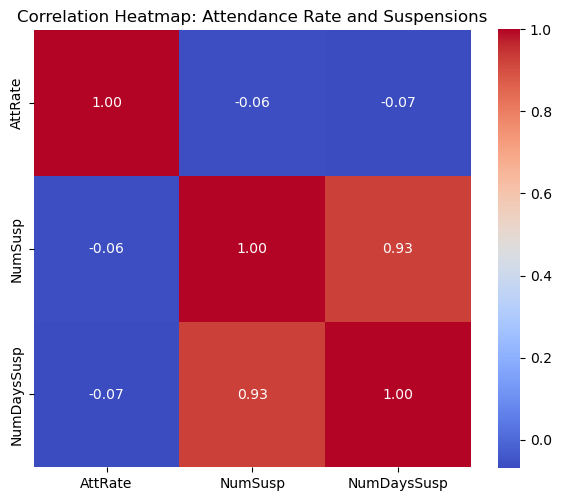

In [45]:
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)

plt.title("Correlation Heatmap: Attendance Rate and Suspensions")
plt.tight_layout()
plt.show()


In [46]:
# Define dependent variable
y = df_sub["AttRate"]

# Define independent variables
X = df_sub[["NumSusp", "NumDaysSusp"]]

# Add intercept term (constant)
X = sm.add_constant(X)


In [47]:
# Run separate (univariate) OLS regressions and store results
regressors = ["NumSusp", "NumDaysSusp"]
results = []

for var in regressors:
    # Build X with intercept
    X = sm.add_constant(df_sub[[var]])

    # Fit model (automatically drops rows with NaNs in y or X)
    model = sm.OLS(y, X, missing="drop").fit()

    # Extract key stats for reporting
    results.append({
        "regressor": var,
        "nobs": int(model.nobs),
        "coef": model.params.get(var, np.nan),
        "std_err": model.bse.get(var, np.nan),
        "t": model.tvalues.get(var, np.nan),
        "p_value": model.pvalues.get(var, np.nan),
        "ci_low": model.conf_int().loc[var, 0] if var in model.params.index else np.nan,
        "ci_high": model.conf_int().loc[var, 1] if var in model.params.index else np.nan,
        "r2": model.rsquared
    })


In [18]:
# Fit OLS regression
# missing="drop" means rows with any NaNs in y or X are automatically removed for estimation
model = sm.OLS(y, X, missing="drop").fit()


In [19]:
# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                AttRate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     42.94
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           2.48e-19
Time:                        02:44:17   Log-Likelihood:                 10043.
No. Observations:               17656   AIC:                        -2.008e+04
Df Residuals:                   17653   BIC:                        -2.006e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8481      0.001    809.163      

# the effect of social economic and education factors

In [48]:
# Select variables of interest (keep missing values)
df_sub = df[
    [
        "AttRate",
        "poverty_rate_pct_res",
        "median_household_income_res",
        "unemployment_rate_pct_res",
        "high_school_plus_rate_pct_res",
        "college_degree_rate_pct_res",
        "median_gross_rent_res",
        "median_home_value_res",
        "uninsured_rate_pct_res"
    ]
]


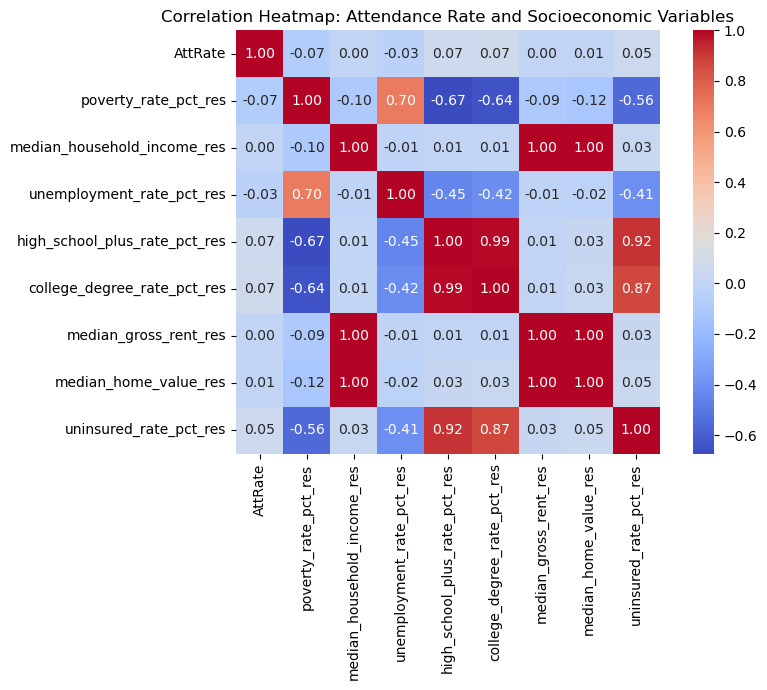

In [23]:
# Compute correlation matrix (pairwise NaN handling)
corr_matrix = df_sub.corr()
# Plot heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)

plt.title("Correlation Heatmap: Attendance Rate and Socioeconomic Variables")
plt.tight_layout()
plt.show()


In [49]:
# Dependent variable
y = df_sub["AttRate"]

# List of regressors to run separately
regressors = [
    "poverty_rate_pct_res",
    "median_household_income_res",
    "unemployment_rate_pct_res",
    "high_school_plus_rate_pct_res",
    "college_degree_rate_pct_res",
    "median_gross_rent_res",
    "median_home_value_res",
    "uninsured_rate_pct_res"
]



In [51]:
results = []

for var in regressors:
    # Build X with intercept
    X = sm.add_constant(df_sub[[var]])

    # Fit univariate OLS
    model = sm.OLS(y, X, missing="drop").fit()

    # Store key statistics
    results.append({
        "regressor": var,
        "nobs": int(model.nobs),
        "coef": model.params.get(var, np.nan),
        "std_err": model.bse.get(var, np.nan),
        "t": model.tvalues.get(var, np.nan),
        "p_value": model.pvalues.get(var, np.nan),
        "ci_low": model.conf_int().loc[var, 0] if var in model.params.index else np.nan,
        "ci_high": model.conf_int().loc[var, 1] if var in model.params.index else np.nan,
        "r2": model.rsquared
    })



In [55]:
results_df = pd.DataFrame(results)
results_df

,regressor,nobs,coef,std_err,t,p_value,ci_low,ci_high,r2
0,poverty_rate_pct_res,17255,-2.120878e-03,2.341163e-04,-9.059078,1.453415e-19,-2.579769e-03,-1.661986e-03,0.004734
1,median_household_income_res,17255,6.216078e-11,1.187085e-10,0.523642,6.005340e-01,-1.705198e-10,2.948414e-10,0.000016
2,unemployment_rate_pct_res,17255,-2.095905e-03,5.494374e-04,-3.814638,1.368581e-04,-3.172858e-03,-1.018952e-03,0.000843
3,high_school_plus_rate_pct_res,17255,7.981500e-04,8.526986e-05,9.360283,8.907090e-21,6.310124e-04,9.652876e-04,0.005053
4,college_degree_rate_pct_res,17255,4.969180e-04,5.127731e-05,9.690797,3.757619e-22,3.964093e-04,5.974268e-04,0.005414
5,median_gross_rent_res,17255,5.798526e-11,1.187251e-10,0.488399,6.252733e-01,-1.747280e-10,2.906985e-10,0.000014
6,median_home_value_res,17255,9.815058e-11,1.185259e-10,0.828094,4.076289e-01,-1.341723e-10,3.304734e-10,0.000040
7,uninsured_rate_pct_res,17255,2.716270e-03,3.792006e-04,7.163147,8.202601e-13,1.972998e-03,3.459541e-03,0.002965


#  the effect of crime factors

In [27]:
# Compute per-capita crime rates
df["total_crime_rate_res"] = df["total_crimes_res"] / df["total_population_res"]
df["violent_crime_rate_res"] = df["violent_crimes_res"] / df["total_population_res"]
df["property_crime_rate_res"] = df["property_crimes_res"] / df["total_population_res"]
df["drug_crime_rate_res"] = df["drug_crimes_res"] / df["total_population_res"]
df["other_crime_rate_res"] = df["other_crimes_res"] / df["total_population_res"]


In [28]:
# Select variables for analysis
df_sub = df[
    [
        "AttRate",
        "total_crime_rate_res",
        "violent_crime_rate_res",
        "property_crime_rate_res",
        "drug_crime_rate_res",
        "other_crime_rate_res"
    ]
]


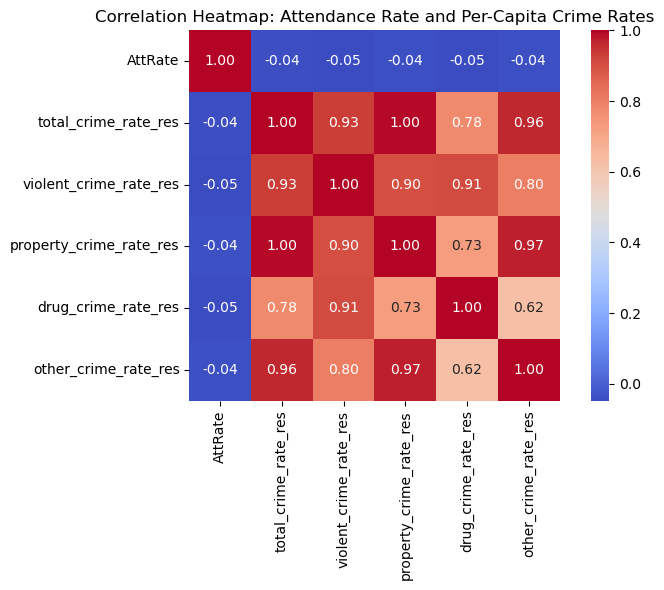

In [29]:
# Compute correlation matrix (pairwise NaN handling)
corr_matrix = df_sub.corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)

plt.title("Correlation Heatmap: Attendance Rate and Per-Capita Crime Rates")
plt.tight_layout()
plt.show()


In [36]:
# Dependent variable
y = df_sub["AttRate"]

# Independent variables
X = df_sub[
    [
        "total_crime_rate_res",
        "violent_crime_rate_res",
        "property_crime_rate_res",
        "drug_crime_rate_res",
        "other_crime_rate_res"
    ]
]


In [37]:
# List of single regressors to run separately
regressors = [
    "total_crime_rate_res",
    "violent_crime_rate_res",
    "property_crime_rate_res",
    "drug_crime_rate_res",
    "other_crime_rate_res"
]


In [38]:
# Run separate (univariate) OLS regressions and store results
results = []

for var in regressors:
    # Build X with intercept
    X = sm.add_constant(df[[var]])

    # Fit model (automatically drops rows with NaNs in y or X)
    model = sm.OLS(y, X, missing="drop").fit()

    # Extract key stats for reporting
    results.append({
        "regressor": var,
        "nobs": int(model.nobs),
        "coef": model.params.get(var, np.nan),
        "std_err": model.bse.get(var, np.nan),
        "t": model.tvalues.get(var, np.nan),
        "p_value": model.pvalues.get(var, np.nan),
        "ci_low": model.conf_int().loc[var, 0] if var in model.params.index else np.nan,
        "ci_high": model.conf_int().loc[var, 1] if var in model.params.index else np.nan,
        "r2": model.rsquared
    })


In [39]:
# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Optional: sort by p-value (smallest first)
results_df = results_df.sort_values("p_value")

results_df


,regressor,nobs,coef,std_err,t,p_value,ci_low,ci_high,r2
1,violent_crime_rate_res,17255,-0.246961,0.039375,-6.272057,3.647874e-10,-0.324140,-0.169782,0.002275
3,drug_crime_rate_res,17255,-2.826487,0.462395,-6.112704,1.000628e-09,-3.732829,-1.920145,0.002161
0,total_crime_rate_res,17255,-0.062584,0.011287,-5.544607,2.989358e-08,-0.084709,-0.040460,0.001779
2,property_crime_rate_res,17255,-0.153477,0.029778,-5.154094,2.576718e-07,-0.211845,-0.095110,0.001537
4,other_crime_rate_res,17255,-0.151925,0.032303,-4.703101,2.582235e-06,-0.215242,-0.088607,0.001280


In [33]:
# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                AttRate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.495
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           4.68e-09
Time:                        03:05:12   Log-Likelihood:                 9829.7
No. Observations:               17255   AIC:                        -1.965e+04
Df Residuals:                   17249   BIC:                        -1.960e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     